<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#eazy-py-photozs-from-JWST-catalogs" data-toc-modified-id="eazy-py-photozs-from-JWST-catalogs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>eazy-py photozs from JWST catalogs</a></span><ul class="toc-item"><li><span><a href="#Download-files" data-toc-modified-id="Download-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Download files</a></span></li><li><span><a href="#Initialize-eazy-py-object" data-toc-modified-id="Initialize-eazy-py-object-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Initialize eazy-py object</a></span></li><li><span><a href="#Plot-an-SED" data-toc-modified-id="Plot-an-SED-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot an SED</a></span></li><li><span><a href="#Visualization-tool" data-toc-modified-id="Visualization-tool-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualization tool</a></span></li></ul></li></ul></div>

# eazy-py photozs from JWST catalogs

Catalogs and mosaics at https://s3.amazonaws.com/grizli-v2/JwstMosaics/v4/index.html

In [1]:
import os

WORKING_DIRECTORY = '/tmp/' # or anywhere else

os.chdir(WORKING_DIRECTORY)

In [2]:
import eazy
if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs()

# This is the same template set as https://github.com/gbrammer/eazy-photoz/tree/master/templates/sfhz
# but it had a different filename when computed locally and with results stored in the h5 files
if not os.path.exists('templates/xspline_templates'):
    os.chdir('templates')
    os.system('wget https://s3.amazonaws.com/grizli-v2/CarnallTemplates/xspline_templates.tar.gz')
    os.system('tar xzvf xspline_templates.tar.gz')
    os.chdir(WORKING_DIRECTORY)

## Download files

Download the `eazy-py` products for a given field

- `ceers-grizli-v4.0-fix.eazypy.h5` - precomputed photo-z information, including p(z)
- `ceers-grizli-v4.0-fix.eazypy.zout.fits` - photoz catalog
- `ceers-grizli-v4.0-fix.eazypy.zphot.param` - eazy-py parameters
- `ceers-grizli-v4.0-fix.eazypy.zphot.translate` - filter translation file for eazy-py
- `ceers-grizli-v4.0-fix.eazypy.zphot.zeropoint` - zeropoint scale factors for photoz
- `ceers-grizli-v4.0-fix_phot_apcorr.fits` - full photometric catalog with aperture corrections

In [3]:
base_url = 'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v4'

root = 'ceers-grizli-v4.0-fix'

for ext in ['.eazypy.h5', '.eazypy.zout.fits',
            '.eazypy.zphot.param', '.eazypy.zphot.translate',
            '.eazypy.zphot.zeropoint', '_phot_apcorr.fits']:
    file = root + ext
    if not os.path.exists(file):
        os.system(f'wget "{base_url}/{file}" -O {file}')
        print(file)
    else:
        print(f'{file} exists')

ceers-grizli-v4.0-fix.eazypy.h5 exists
ceers-grizli-v4.0-fix.eazypy.zout.fits exists
ceers-grizli-v4.0-fix.eazypy.zphot.param exists
ceers-grizli-v4.0-fix.eazypy.zphot.translate exists
ceers-grizli-v4.0-fix.eazypy.zphot.zeropoint exists
ceers-grizli-v4.0-fix_phot_apcorr.fits exists


## Initialize eazy-py object

Read outputs from the previous `eazy-py` run that are stored in the `hdf5` file.  This run used the `{filt}_tot_1` aperture photometry columns corresponding to `D=0.5"` apertures.

In [4]:
from grizli.pipeline import photoz
import os
import eazy.hdf5
from grizli import utils
utils.set_warnings()

self = eazy.hdf5.initialize_from_hdf5(h5file=root+'.eazypy.h5')
self.fit_phoenix_stars()

zout = utils.read_catalog(root+'.eazypy.zout.fits')
self.cat = utils.read_catalog(root+'_phot_apcorr.fits')
cat = self.cat

Read default param file: /Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 26438
f105w_tot_1 f105w_etot_1 (202): hst/wfc3/IR/f105w.dat
f115w_tot_1 f115w_etot_1 (364): jwst_nircam_f115w
f125w_tot_1 f125w_etot_1 (203): hst/wfc3/IR/f125w.dat
f140w_tot_1 f140w_etot_1 (204): hst/wfc3/IR/f140w.dat
f150w_tot_1 f150w_etot_1 (365): jwst_nircam_f150w
f160w_tot_1 f160w_etot_1 (205): hst/wfc3/IR/f160w.dat
f200w_tot_1 f200w_etot_1 (366): jwst_nircam_f200w
f277w_tot_1 f277w_etot_1 (375): jwst_nircam_f277w
f356w_tot_1 f356w_etot_1 (376): jwst_nircam_f356w
f410m_tot_1 f410m_etot_1 (383): jwst_nircam_f410m
f435w_tot_1 f435w_etot_1 (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f444w_tot_1 f444w_etot_1 (377): jwst_nircam_f444w
f606w_tot_1 f606w_etot_1 (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f606wu_tot_1 f606wu_etot_1 (214): hst/wfc3/UVIS/f606w.dat
f814w_tot_1 f814w_etot_1 (239): hst/ACS_update_sep07/wfc_f814w_t

294it [00:01, 180.30it/s]


h5: read corr_sfhz_13_bin0_av0.01.fits
h5: read corr_sfhz_13_bin0_av0.25.fits
h5: read corr_sfhz_13_bin0_av0.50.fits
h5: read corr_sfhz_13_bin0_av1.00.fits
h5: read corr_sfhz_13_bin1_av0.01.fits
h5: read corr_sfhz_13_bin1_av0.25.fits
h5: read corr_sfhz_13_bin1_av0.50.fits
h5: read corr_sfhz_13_bin1_av1.00.fits
h5: read corr_sfhz_13_bin2_av0.01.fits
h5: read corr_sfhz_13_bin2_av0.50.fits
h5: read corr_sfhz_13_bin2_av1.00.fits
h5: read corr_sfhz_13_bin3_av0.01.fits
h5: read corr_sfhz_13_bin3_av0.50.fits
h5: read 4590.fits
fit_best: 3.5 s (n_proc=2,  NOBJ=25859)
phoenix_templates: /tmp/bt-settl_t400-7000_g4.5.fits


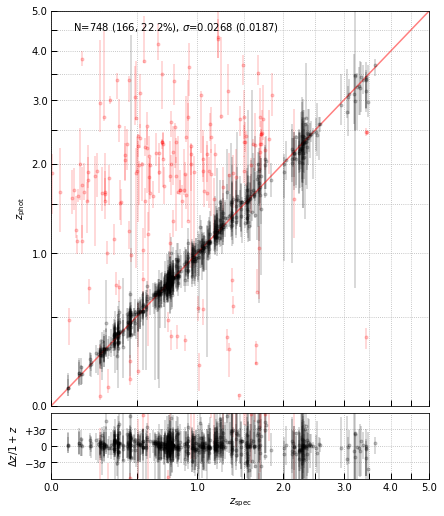

In [5]:
# Spec-zs stored in zout but not in h5 file, so put them in
# CEERS specz compilation from J. Weaver
self.cat['z_spec'] = zout['z_spec']
_ = self.zphot_zspec(zmax=5)

## Plot an SED

Separation from (214.914612,52.943129) : 0.4 arcsec


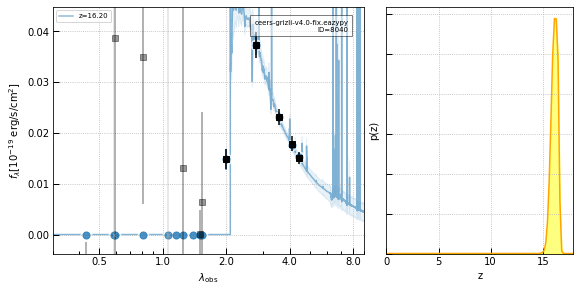

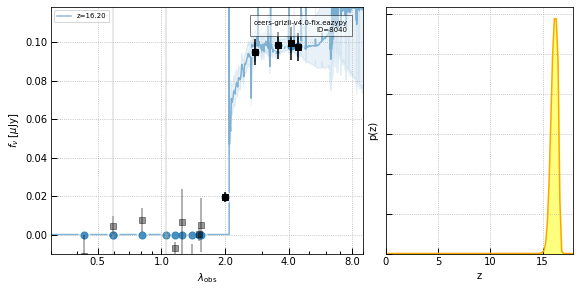

In [6]:
# Find by ra, dec

ra, dec = 214.9146116, 52.9431292 # Naidu / Donnan z=16 source

_coo = utils.GTable(names=['ra','dec'], rows=[[ra, dec]])
idx, dr = self.cat.match_to_catalog_sky(_coo)
print(f'Separation from ({ra:.6f},{dec:.6f}) : {dr[0]:.2}')

_ = self.show_fit(idx[0], id_is_idx=True)

_ = self.show_fit(idx[0], id_is_idx=True, show_fnu=True)

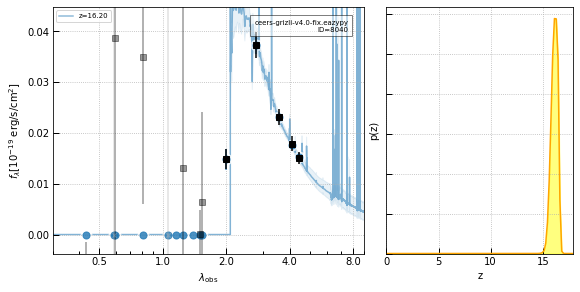

In [7]:
# by ID, but be careful because IDs may be duplicated in the concatenated ceers nw + se catalog

obj_id = 8040

_ = self.show_fit(obj_id)

In [8]:
if 0:
    # By pan position from an open DS9 window
    from grizli.pipeline import photoz
    import grizli.ds9

    # (ds9 window already open with ceers-sw-grizli-v4.0-f444w-clear_drc_sci.fits.gz)
    ds9 = grizli.ds9.DS9()
    ds9.set(f'pan to {ra} {dec} fk5')

    # This plots the nearest object to the center of the active DS9 window
    _ = photoz.show_from_ds9(ds9, self, zout)

## Visualization tool

In [9]:
import eazy.visualization
from importlib import reload
reload(eazy.visualization)

<module 'eazy.visualization' from '/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/visualization.py'>

In [10]:
vis = eazy.visualization.EazyExplorer(self, zout)

if 1:
    app = vis.make_dash_app(server_mode='inline', plot_height=450,
                        infer_proxy=os.getcwd().startswith('/content'))

/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/templates.py:104: RuntimeWarning:

divide by zero encountered in divide

/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/templates.py:105: RuntimeWarning:

divide by zero encountered in divide

/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/igm.py:193: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/photoz.py:2701: RuntimeWarning:

divide by zero encountered in divide

/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/eazy/photoz.py:2718: RuntimeWarning:

invalid value encountered in multiply

/Users/gbrammer/miniconda3/envs/py39-aug11/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning:

Mean of empty slice

